# DSGRN Pattern Match Tutorial

This tutorial presents the pattern matching features in DSGRN.

## Functions demonstrated

In this tutorial the following classes/functions are demonstrated:

* `Network`
* `DrawGraph`
* `ParameterGraph`
* `ParameterGraph::parameter`
* `DomainGraph`
* `SearchGraph`
* `PosetOfExtrema`
* `PatternGraph`
* `MatchingGraph`
* `PathMatch`
* `CycleMatch`
* `DrawGraphWithHighlightedPath`


In [1]:
from DSGRN import *

## Network

We construct an example network by hand.

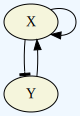

In [2]:
network = Network();
network.assign("X : X + Y \n" + "Y : ~X \n")
DrawGraph(network)

## Parameter Graph

Corresponding to the network is a parameter graph. We construct a `ParameterGraph` object in order to get access to the combinatorial parameters we need to produce domain graphs. 

In [3]:
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

120


## Search Graph

There are 120 parameters to study; let's study the parameter corresponding to parameter index `31`.

In [4]:
parameter = parameter_graph.parameter(31)

Next, we create a domain graph corresponding to this choice of parameter index. We'll draw it as well; note the visualization of the domain graph does not illustrate all of the information contained in the domain graph.

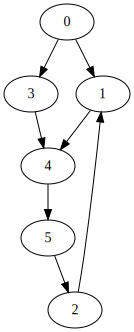

In [5]:
domain_graph = DomainGraph(parameter)
DrawGraph(domain_graph)

Finally, we create a search graph from the domain graph. This procedure discards self-edges in the domain graph, and labels  vertices according to whether trajectories may be increasing `I`, decreasing `D`, or either `*` in each coordinate. Edges are labelled according to whether a trajectory passing through the corresponding wall could possibly experience a minima event `m`, could possibly experience a maxima event `M`, or could not possibly experience either event `-`.

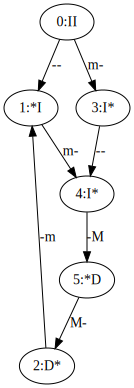

In [6]:
search_graph = SearchGraph(domain_graph)
DrawGraph(search_graph)

## Poset of Extrema

We specify a partial order of extremal events using the class `PosetOfExtrema`.
To construct an object of this class we provide a `Network` object under consideration; the variables experiencing extrema correspond to the nodes of the network. We also provide a list of "events". These represent the extremal events experienced by the variables corresponding to the network nodes. We encode this as a list of pairs (`network node name`, `extrema type`) where `extrema type` may be either `min` or `max`. The order of events in this list gives an indexing (the first is index 0, the second is index 1, etc.) which we use in order to specify the ordering of events -- but it is not just the total order given by the indexing. Rather, we provide a list of pairs (or length-2 lists) indicating which events happen before others. It is not necessary for this list to be transitively closed (e.g. the code can automatically determine that (1,3) and (3,5) together imply (1,5)).

It is a requirement that all events corresponding to the same variable are comparable in the poset. Moreover, it is a requirement that consecutive events in the same variable have a different `extreme type`, e.g. we cannot have two `min` events for the same variable consecutively.

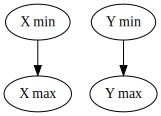

In [7]:
events = [("X", "min"), ("Y", "min"), ("X", "max"), ("Y", "max")]
event_ordering = [(0,2),(1,3)]
poe = PosetOfExtrema(network, events, event_ordering )
DrawGraph(poe)

# PatternGraph

From a `PosetOfExtrema` we may construct a `PatternGraph` object, which has vertices in one-to-one correspondence with down-sets of the poset of extrema. Vertices are labelled according to a status of "D" (decreasing) or "I" (increasing) for each variable, according to what the status of the function must be which is consistent with having experienced the extrema in the corresponding down-set (and ready to experience the extrema not in the down-set).

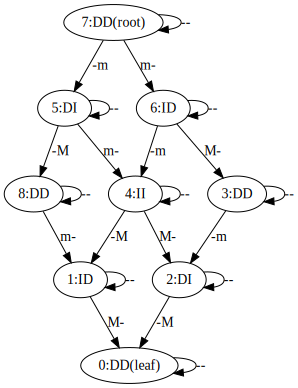

In [8]:
pattern_graph = PatternGraph(poe);
DrawGraph(pattern_graph)

## MatchingGraph

This corresponds to the `AlignmentGraph` concept in the paper, specialized to the case of the matching relation specific to DSGRN.

In particular it computes the subgraph of the tensor product of `search_graph` and `pattern_graph` consisting of vertices $(u,v)$ such that $u$ and $v$ have matching labels, and edges $(u,v) \to (u', v')$ whenever $u \to u'$ and $v \to v'$ have matching labels.

As described in the paper it provides a data structure which can quickly support path and cycle matching queries. In the visualization below the ordered pair labels correspond to the indexing in the search graph and pattern graph respectively.

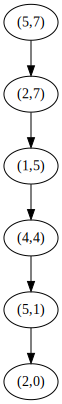

In [9]:
matching_graph = MatchingGraph(search_graph, pattern_graph);
DrawGraph(matching_graph)

## Finding Matches: `PathMatch` and `CycleMatch`

Using `matching_graph` as a data structure we can search for a pair of paths (or cycles) in the search graph and pattern match such that the labels match (according to the matching relation). 

In the example below, we find a pair of matching paths and a pair of matching cycles. As it happens in this example, the matches are same (any cycle match is a path match).



In [10]:
path_match = PathMatch(matching_graph)

In [11]:
print(path_match)

[(2, 7), (1, 5), (4, 4), (5, 1), (2, 0)]


In [12]:
cycle_match = CycleMatch(matching_graph)

In [13]:
print(cycle_match)

[(2, 7), (1, 5), (4, 4), (5, 1), (2, 0)]


## Visualizing Matches

In order to visualize the match we have functionality to draw the matching graph, search graph, and pattern graph with highlighted paths. We can extract a path in the search graph and a path in the pattern graph from the path in the matching graph by projecting onto the first and second coordinates.

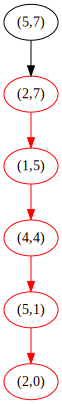

In [14]:
DrawGraphWithHighlightedPath(matching_graph, path_match)

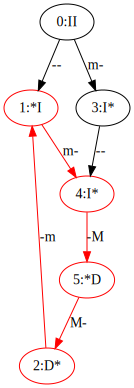

In [15]:
search_graph_path_match = [ pair[0] for pair in path_match ]
DrawGraphWithHighlightedPath(search_graph, search_graph_path_match)

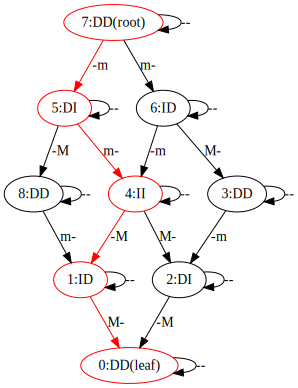

In [16]:
pattern_graph_path_match = [ pair[1] for pair in path_match ]
DrawGraphWithHighlightedPath(pattern_graph, pattern_graph_path_match)